# Clustering of Wholesale Customers

## Introduction / Overview


## The dataset

- #### What is the purpose of this dataset?

The purpose of this dataset is to get an overview over the annual spending on diverse product categories.

- #### What are the features? 

- Feature 1 =	CHANNEL: Customer Channel - Horeca (Hotel/Restaurant/Cafe's) or Retail channel (Nominal)
- Feature 2 =	FRESH: annual spending (m.u.) on fresh products (Continuous);
- Feature 3 =	MILK: annual spending (m.u.) on milk products (Continuous);
- Feature 4 =	GROCERY: annual spending (m.u.)on grocery products (Continuous);
- Feature 5 =	FROZEN: annual spending (m.u.)on frozen products (Continuous)
- Feature 6 =	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- Feature 7 =	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

There are no missing values in this dataset.

  
- #### What are the targets? 

The target is the Region, which is customer region, either Lisbon, Porto or Other(Nominal)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

In [3]:
wholesale_customer_data_csv = pd.read_csv('Wholesale_customers_data.csv',sep=',')
wholesale_customer_data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
target = wholesale_customer_data_csv['Region']
dataset = wholesale_customer_data_csv.drop(columns='Region')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


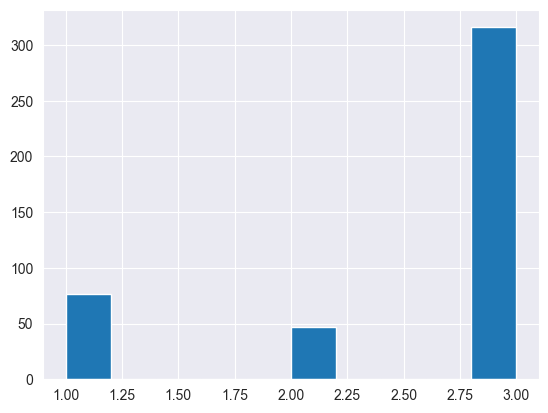

In [5]:
target.hist();

We can observe that target data is mostly distributed in the 3 which is Other(Nominal)

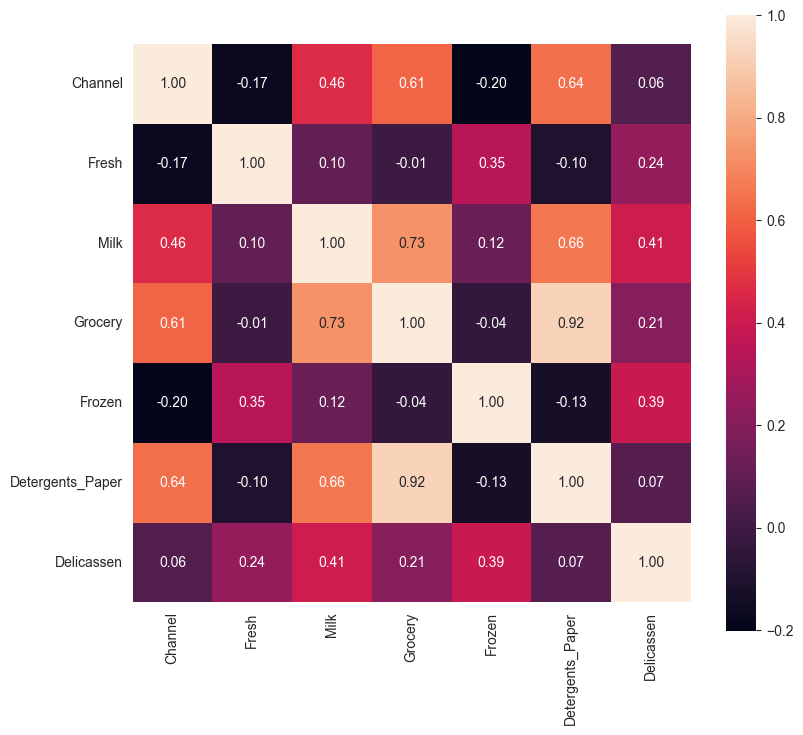

In [6]:
corrmat = dataset.corr()
fig, ax = plt.subplots(figsize=(9,8))
sb.heatmap(corrmat,ax=ax, square=True,annot=True, fmt='.2f');


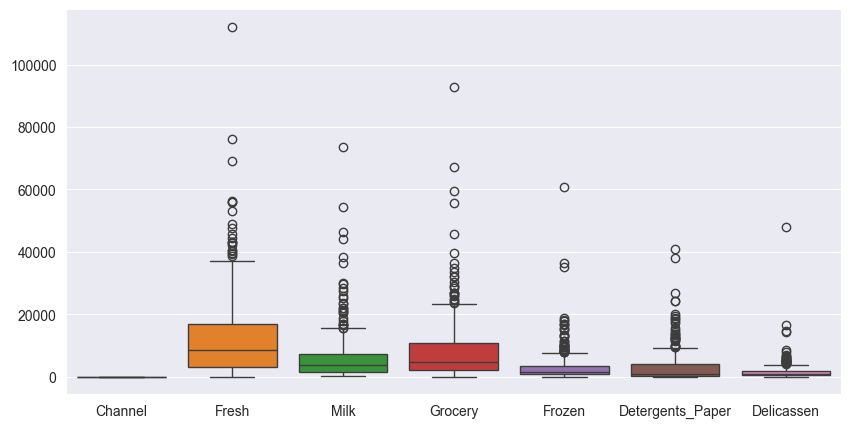

In [7]:
plt.figure(figsize=(10, 5))
fig = sb.boxplot(data=dataset)

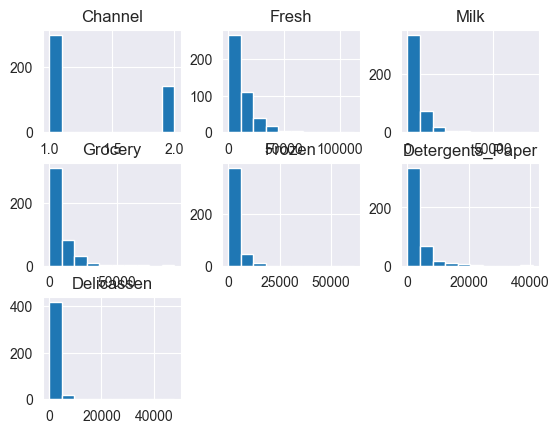

In [8]:
dataset.hist();

### Histogram observation

We see there is a big gap in the size of value in the x axis. So we will need to standardize it to center the data more.

In [9]:
scaler = StandardScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset))

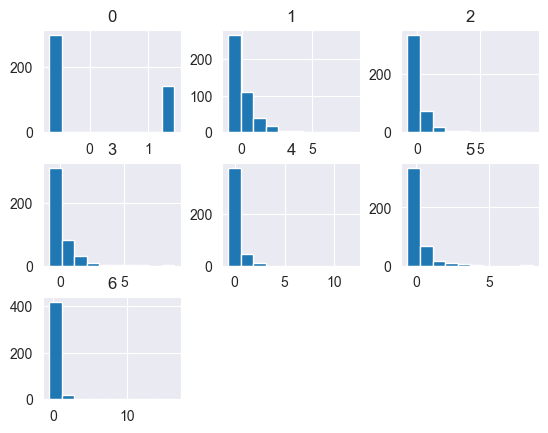

In [10]:
dataset_scaled.hist();

## Creating Elbow method

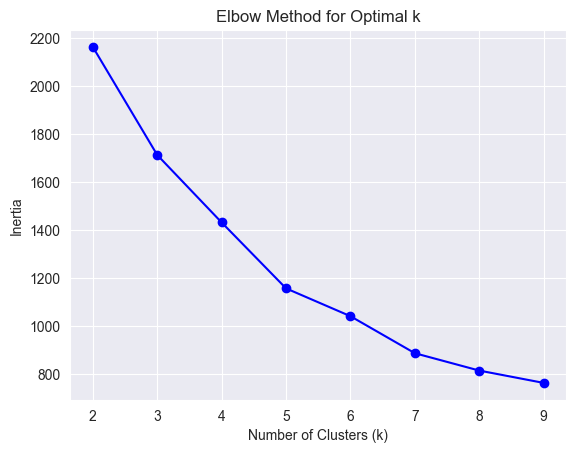

In [11]:
k_values = range(2, 10)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Struggling to get a clear elbow, but a place between k=3 and k=4

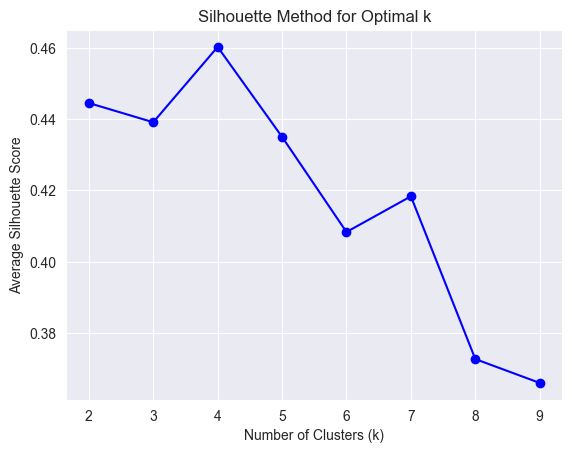

In [12]:
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dataset_scaled)
    silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


Highest peak at k=4, so we will use 4 clusters when using KMeans

## KMeans clustering

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dataset_scaled)

labels = kmeans.labels_

In [14]:

ari = adjusted_rand_score(target, labels)
print(f'Adjusted Rand Index: {ari}')

homogeneity = homogeneity_score(target, labels)
print(f'Homogeneity: {homogeneity}')

completeness = completeness_score(target, labels)
print(f'Completeness: {completeness}')

v_measure = v_measure_score(target, labels)
print(f'V-Measure: {v_measure}')

sil_score = silhouette_score(dataset_scaled, labels)
print(f'Silhouette Score: {sil_score}')

dbi = davies_bouldin_score(dataset_scaled, labels)
print(f'Davies-Bouldin Index: {dbi}')


Adjusted Rand Index: -0.01302626695693025
Homogeneity: 0.007548232402224752
Completeness: 0.006615876309574941
V-Measure: 0.007051368066307299
Silhouette Score: 0.46030499825903043
Davies-Bouldin Index: 1.1086949287450174


In [15]:
'''# Silhouette score to evaluate clustering
sil_score = silhouette_score(dataset_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

dbi = davies_bouldin_score(dataset_scaled, kmeans.labels_)
print(f'Davies-Bouldin Index: {dbi}')
''';

## Discussing the results of the KMeans clustering

### What are the metrics we are looking at?


- Silhouette Score measures how similar an object is to its own cluster compared to other clusters. This can help with an overall overview over how well data points are clustered.
- Davies-Bouldin Score: Tells us how well clusters are separated by considering the ratio of how tight the clusters are to how far apart the clusters are.

### The results

The results 

# DBscan

In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted_labels1 = dbscan.fit_predict(dataset_scaled)

dataset['Cluster'] = predicted_labels1

dataset['Cluster'].value_counts()

Cluster
 1    201
-1    194
 0     32
 3      8
 2      5
Name: count, dtype: int64

In [17]:
sil_score = silhouette_score(dataset_scaled[predicted_labels1 != -1], predicted_labels1[predicted_labels1 != -1])
print(f'Silhouette Score: {sil_score}')

dbi = davies_bouldin_score(dataset_scaled, predicted_labels1)
print(f'Davies-Bouldin Index: {dbi}')


Silhouette Score: 0.4978742250035533
Davies-Bouldin Index: 1.7444505952841909


### Finding the lowest EPS and trying it with our DB model by obsering the cluster value count

In [18]:
dbscan2 = DBSCAN(eps=0.16, min_samples=5)
predicted_labels2 = dbscan2.fit_predict(dataset_scaled)

dataset['Cluster'] = predicted_labels2

dataset['Cluster'].value_counts()

Cluster
-1    427
 0      7
 1      6
Name: count, dtype: int64

In [19]:
sil_score = silhouette_score(dataset_scaled[predicted_labels2 != -1], predicted_labels2[predicted_labels2 != -1])
print(f'Silhouette Score: {sil_score}')

dbi = davies_bouldin_score(dataset_scaled, predicted_labels2)
print(f'Davies-Bouldin Index: {dbi}')

Silhouette Score: 0.6129087987539534
Davies-Bouldin Index: 1.3330015903363426


## Finding the optimal min_samples by obsering the cluster value count

In [20]:
dbscan3 = DBSCAN(eps=0.16, min_samples=6)
predicted_labels3 = dbscan3.fit_predict(dataset_scaled)

dataset['Cluster'] = predicted_labels3

dataset['Cluster'].value_counts()

Cluster
-1    428
 1      6
 0      6
Name: count, dtype: int64

In [21]:
sil_score = silhouette_score(dataset_scaled[predicted_labels3 != -1], predicted_labels3[predicted_labels3 != -1])
print(f'Silhouette Score: {sil_score}')

dbi = davies_bouldin_score(dataset_scaled, predicted_labels3)
print(f'Davies-Bouldin Index: {dbi}')

Silhouette Score: 0.6611076420544953
Davies-Bouldin Index: 1.3306601558802684


## After tuning the hyperparameters

After manually testing the amount of minimum samples and EPS by manually tweaking. This is the best result I have gotten.

In [22]:
ari = adjusted_rand_score(target, predicted_labels1)
homogeneity = homogeneity_score(target, predicted_labels1)
completeness = completeness_score(target, predicted_labels1)
v_measure = v_measure_score(target, predicted_labels1)

print(f'Adjusted Rand Index: {ari}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')

Adjusted Rand Index: -0.015591678977594177
Homogeneity: 0.01414234364976026
Completeness: 0.010698113062642942
V-Measure: 0.012181450050420465


In [23]:
ari = adjusted_rand_score(target, predicted_labels2)
homogeneity = homogeneity_score(target, predicted_labels2)
completeness = completeness_score(target, predicted_labels2)
v_measure = v_measure_score(target, predicted_labels2)

print(f'Adjusted Rand Index: {ari}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')

Adjusted Rand Index: 0.004201577589514533
Homogeneity: 0.008537389452179677
Completeness: 0.0434609857603361
V-Measure: 0.014271344437020644


In [24]:
ari = adjusted_rand_score(target, predicted_labels3)
homogeneity = homogeneity_score(target, predicted_labels3)
completeness = completeness_score(target, predicted_labels3)
v_measure = v_measure_score(target, predicted_labels3)

print(f'Adjusted Rand Index: {ari}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')

Adjusted Rand Index: 0.007367337122277948
Homogeneity: 0.00865172075930867
Completeness: 0.04695289560995865
V-Measure: 0.014611137282581878


# Discussion 



# Conclussion



### Possible improvements

- Add more insight in noise with the DBScan